In [1]:
import numpy as np
import nibabel
import nilearn
from nilearn.image import resample_to_img
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn.plotting import show
from nilearn.plotting import plot_roi
from nilearn import image
from nilearn.image import load_img

/jukebox/pkgs/PYGER/beta/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
projectDir='/jukebox/norman/amennen/prettymouth_fmriprep2/'
templateImg='/jukebox/norman/amennen/MNI_things/mni_icbm152_nlin_asym_09c_nifti/mni_icbm152_nlin_asym_09c/mni_icbm152_t1_tal_nlin_asym_09c.nii'
DMN_mask='/jukebox/norman/amennen/MNI_things/Yeo_JNeurophysiol11_MNI152/Yeo_Network7mask_reoriented.nii.gz'
exfunctional=projectDir + 'derivatives/fmriprep/sub-039/func/sub-039_task-prettymouth_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'

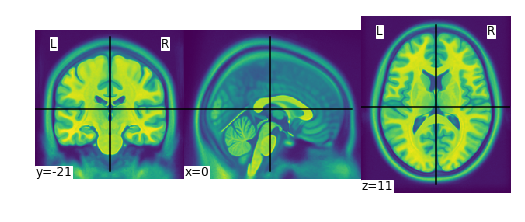

In [3]:
plotting.plot_img(templateImg)
# save results with more_smooth_anat_img.to_filename('more_smooth_anat_img.nii.gz')

In [4]:
mask_img = load_img(DMN_mask)
template_img = load_img(templateImg)
functional_img = load_img(exfunctional)
resampled_mask_img = resample_to_img(DMN_mask,templateImg,interpolation='nearest')
resampled_mask2func = resample_to_img(DMN_mask,exfunctional,interpolation='nearest')

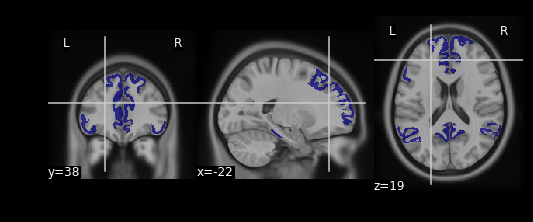

In [5]:
plot_roi(resampled_mask_img,template_img)
# save results with 
resampled_mask_img.to_filename('/jukebox/norman/amennen/MNI_things/Yeo_JNeurophysiol11_MNI152/Yeo_Network7mask_reoriented_resampled.nii.gz')

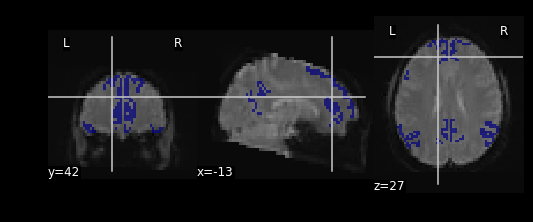

In [6]:
first_rsn = image.index_img(functional_img, 0)
plot_roi(resampled_mask2func,first_rsn)
# save results with 
resampled_mask2func.to_filename('/jukebox/norman/amennen/MNI_things/Yeo_JNeurophysiol11_MNI152/Yeo_Network7mask_reoriented_resampledBOLD2.nii.gz')

# standard way: Harvard-Oxford -- precuneus

In [7]:
pwd

'/mnt/bucket/labs/norman/amennen/prettymouth_fmriprep2/code'

In [10]:
# let's check that the mask is just 1 and 0's
new_mask = '/jukebox/norman/amennen/MNI_things/Yeo_JNeurophysiol11_MNI152/Yeo_Network7mask_reoriented_resampledBOLD.nii.gz'
#mask_data = mask.get_data().astype(int)
mask = nibabel.load(new_mask)
mask_data = mask.get_data()

In [13]:
np.sum(mask_data)

3757.0